
<h1 style="color: red;">Makine Öğrenmesi Model Tuning Rehberi(Ağaç tabanlı model ile)</h1>

## Model Tuning  Nedir?
* Model tuning, makine öğrenmesi modelinin hiperparametrelerini ayarlayarak en iyi performansı elde etme sürecidir.Hiperparametreler öğrenme algoritmasının davranışını kontrol eden ve öğrenme süreci başlamadan önce belirlenen parametrelerdir
## Neden Önemli?
* Modelin aşırı öğrenme ve eksik öğrenme arasında ideal dengeyi bulmasını sağlar
* Modelin genelleme yeteneğini arttırır
* Tahmin doğruluğunu yükseltir
* Hesaplama kaynaklarının verimli kullanılmasını sağlar

## Model Tuning Süreci
### 1-) Veri Hazırlama --> Öncelikle veriyi eğitim,doğrulama ve test setlerine ayır

* Eğitim Seti: Modeli eğitmek için kullanılır(%60-70)
* Doğrulama Seti: Hiperparametreleri optimize etmek için kullanılır(%15-20)
* Test Seti: Final modelin performansını değerlendirmek için kullanılır(%15-20)

### 2-) Başlangıç Modeli Oluşturma --> Varsayılan hiperparametreler ile başlangıç modeli oluşturulur

### 3-) Hiperparametrelerin Belirlenmesi --> Optimize edilecek hiperparametrelerin listesi çıkarılır.Ağaç tabanlı modeller için bunlar
* Ağaç derinliği (max_depth)
* Minimum yaprak düğümü örnekleri (min_samples_leaf)
* Minimum bölünme için örnekler (min_samples_split)
* Özellik sayısı (max_features)
* Ağaç sayısı (n_estimators,topluluk modelleri için)
* Öğrenme oranı (learning_rate, boosting modelleri için)

### 4-) Hiperparametre Optimizasyon Teknikleri 
** Grid Search(Izgara Araması)

* Hiperparametrelerin önceden tanımlanmış tüm kombinasyonlarını dener
* Hesaplama açısından yoğundur ama kapsamlıdır

** Random Search(Rastgele Arama)

* Hiperparametreler için rastgele değerler seçer
* Grid search'ten daha verimlidir
* Daha geniş bir hiperparametre alanını keşfedebilir

** Bayesian Optimization(Bayes Optimizasyonu)

* Önceki denemelerin sonuçlarına göre sonraki hiperparametreleri seçer
* Grid ve random search'ten daha verimlidir

** Evolutionarty Algorithms(Evrimsel Algoritmalar)

* Genetik algoritmalar gibi biyolojik evrimden esinlenen arama yöntemlerini kullanır

### 5-) Crass-Validation (Çapraz Doğrulama) --> Hiperparametre ayarlaması sırasında k-katlı çapraz doğrulama kullanılması, modelin genelleme yeteneğini daha iyi değerlendirmeye yardımcı olur

### 6-) Model Değerlendirme --> Modelleri değerlendirmek için uygun metrikler seçilmelidir

* Regresyon:MSE,RMSE,MAE,Rkare
* Sınıflandırma:Accuracy,Precision,Recall,F1 Score,AUC-ROC

### 7-) Final Model Oluşturma --> En iyi hiperparametrelerle final model eğitilir ve test seti üzerinde değerlendirilir.Ağaç tabanlı modellerinin tuning süreci şu şekildedir.

** Karar Ağaçları(Decision Tree)--> Karar ağaçları için önemli hiperparametreler

* max_depth: Ağacın maksimum derinliği
* min_samples_split: Bir düğümün bölünmesi için gereken minimum örnek sayısı
* min_samples_leaf: Bir yaprak düğümde bulunması gereken minimum örnek sayısı
* max_features: Bölünme için dikkate alınacak maksimum özellik sayısı
* criterion: Bölünme kalitesini ölçen fonksiyon(gini veya entropy)

** Random Forest --> Random Forest için önemli hiperparametreler

* n_estimators: Ormandaki ağaç sayısı
* bootsrap: Bootstrap örnekleri kullanılıp kullanılmayacağı
* oob_score: Out-of-bag örneklerini kullanarak skou hesaplama

** Gradient Boosting --> GB(XGBoost,LightGBM,CatBoost) için önemli hiperparametreler

* n_estimators: boosting iterasyonlarının sayısı
* learning_rate: Her ağacın katkısını ölçeklendiren oran
* subsample: Her iterasyonda kullanılacak örnek oranı
* colsample_bytree: Her ağaç için kullanılacak özellik oranı



## Ağaç Tabanlı Modellerin Tuning İpuçları

** 1-) Aşırı Öğrenmeyi Önleme

* max_depth parametresini sınırla
* min_samples_leaf ve min_samples_split değerlerini arttır
* max_features ile her bölünmede dikkate alınan özellik sayısını sınırla

** 2-) Topluluk Modelleri İçin

* Daha fazla ağaç genelde daha iyidir(n_estimators)
* Öğrenme oranını arttır(learning_rate) ve ağaç sayısını düşür

** 3-) Hesaplama Performansı

* n_jobs parametresi ile paralelleştirme yapın(paralelleştirme bir hesaplama işleminin birden fazla işlemci çekirdeği (CPU core) veya işlem  birimi tarafından aynı anda yürütlmesi anlamına gelir)
* Büyük veri setleri için önce küçük bir örnek üzerinde deneyin

# Örnek Uygulama:Ağaç Tabanlı Model Tuning

In [32]:
#GERÇEK HATALARA UYGUN MODEL TUNING ÖRNEĞİ
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV,cross_val_score
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import fetch_california_housing
import warnings
warnings.filterwarnings("ignore")

In [33]:
#Veri setini yükle
housing=fetch_california_housing()
X=pd.DataFrame(housing.data,columns=housing.feature_names)
y=housing.target
print("Veri seti boyutu: ",X.shape)
print("Özellikler: ",X.columns.to_list())
X.head()

Veri seti boyutu:  (20640, 8)
Özellikler:  ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


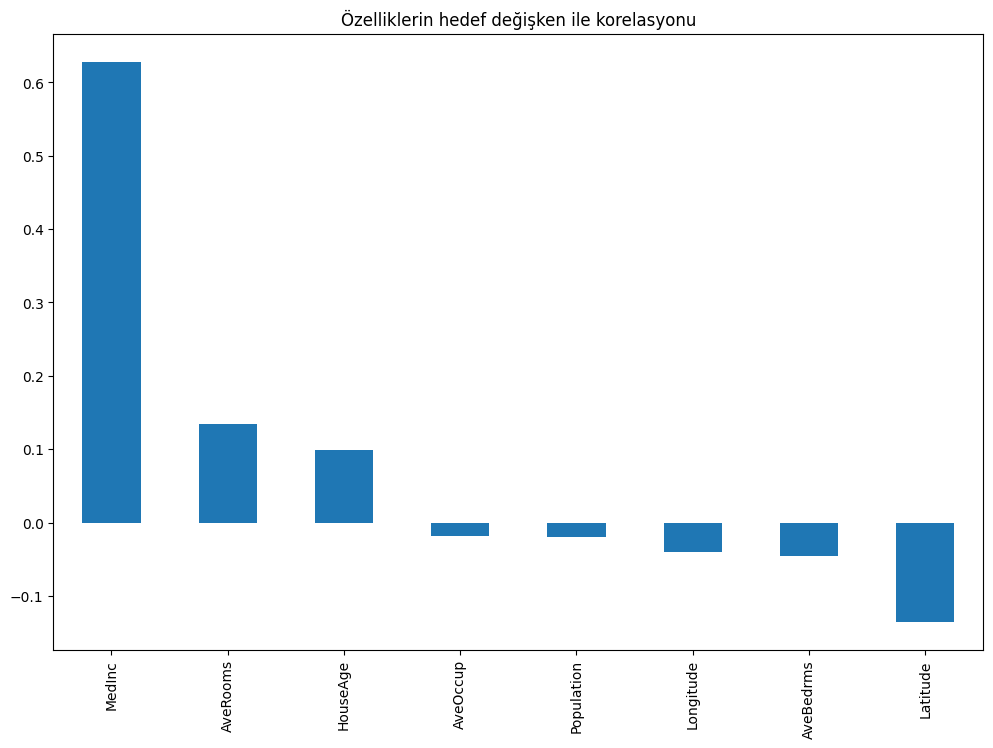

In [34]:
#Veri setine gürültü ekle
np.random.seed(31)
noise=np.random.normal(0,0.5,y.shape)
y_noisy=y + noise

#Özelliklerin hedef değişken ile korelasyonunu görselleştir
plt.figure(figsize=(12,8))
correlation=X.corrwith(pd.Series(y_noisy))
correlation.sort_values(ascending=False).plot(kind="bar")
plt.title("Özelliklerin hedef değişken ile korelasyonu")
plt.show()

In [35]:
#Veriyi eğitim,doğrulama ve test setlerine ayır
X_train,X_temp,y_train,y_temp=train_test_split(X,y_noisy,test_size=0.3,random_state=31) #X_temp, y_temp geçiçi ara değişkenler
X_val,X_test,y_val,y_test=train_test_split(X_temp,y_temp,test_size=0.5,random_state=31)

print(f"Eğitim seti boyutu: {X_train.shape}")
print(f"Doğrulama seti boyutu: {X_val.shape}")
print(f"Test seti boyutu: {X_test.shape}")
#Model performansını değerlendirme
def evaluate_model(model,X_train,X_test,y_train,y_test):
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)

    mse=mean_squared_error(y_test,y_pred)
    rmse=np.sqrt(mse)
    mae=mean_absolute_error(y_test,y_pred)
    r2=r2_score(y_test,y_pred)

    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"R2: {r2}")

    return model, y_pred



Eğitim seti boyutu: (14448, 8)
Doğrulama seti boyutu: (3096, 8)
Test seti boyutu: (3096, 8)


### 1-)Karar Ağacı Model Tuning


In [36]:
#Başlangıç Modeli
dt_default=DecisionTreeRegressor(random_state=31)
dt_default,y_pred_dt_default=evaluate_model(dt_default,X_train,X_val,y_train,y_val)


MSE: 1.0986
RMSE: 1.0481
MAE: 0.8024
R2: 0.29886985707705715


In [37]:
#Grid Search ile Hiperparametre Optimizasyonu
dt_params={"max_depth":[5,10,15,20,None],
           "min_samples_split":[2,5,10],
           "min_samples_leaf":[1,2,4],
           "max_features":["auto","sqrt","log2",None]}
dt_grid=GridSearchCV(DecisionTreeRegressor(random_state=31),
                     dt_params,
                     cv=5,
                     scoring="neg_mean_squared_error",
                     n_jobs=-1)
dt_grid.fit(X_train,y_train)
print("En iyi karar ağacı parametreleri:")
print(dt_grid.best_params_)
print(f"En iyi çapraz doğrulama skoru (MSE): {-dt_grid.best_score_:.4f}")



En iyi karar ağacı parametreleri:
{'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 10}
En iyi çapraz doğrulama skoru (MSE): 0.7194


In [38]:
#En iyi parametreler ile modeli değerlendirme
dt_best=DecisionTreeRegressor(**dt_grid.best_params_,random_state=31)
dt_best,y_pred_dt_best=evaluate_model(dt_best,X_train,X_val,y_train,y_val)

MSE: 0.6898
RMSE: 0.8306
MAE: 0.6295
R2: 0.5597394041793404


## 2-) Random Forest Model Tuning

In [39]:
#Başlangıç Modeli
rf_default=RandomForestRegressor(random_state=31)
rf_default,y_pred_rf_default=evaluate_model(rf_default,X_train,X_val,y_train,y_val)

MSE: 0.5467
RMSE: 0.7394
MAE: 0.5587
R2: 0.6510585545781586


In [40]:
#Randomized Search ile hiperparametre optimizasyonu
rf_params={"n_estimators":[50,75,100,150,200],
           "max_depth":[5,10,20,30,None],
           "min_samples_split":[1,2,3,4],
           "max_features":["auto","sqrt","log2"]}
rf_random=RandomizedSearchCV(RandomForestRegressor(random_state=31),
                             rf_params,
                             n_iter=20,
                             cv=5,
                             scoring="neg_mean_squared_error",
                             n_jobs=-1,
                             random_state=31)
rf_random.fit(X_train,y_train)

print("En iyi Random Forest Parametreleri")
print(rf_random.best_params_)
print(f"En iyi çapraz doğrulama skoru(MSE): {-rf_random.best_score_:.4f}")

En iyi Random Forest Parametreleri
{'n_estimators': 75, 'min_samples_split': 4, 'max_features': 'sqrt', 'max_depth': None}
En iyi çapraz doğrulama skoru(MSE): 0.5169


In [41]:
#En iyi parametreler ile model değerlendirme
print("En iyi parametrelerle Random Forest performansı")
rf_best=RandomForestRegressor(**rf_random.best_params_,random_state=31)
rf_best,y_pred_rf_best=evaluate_model(rf_best,X_train,X_val,y_train,y_val)

En iyi parametrelerle Random Forest performansı
MSE: 0.5107
RMSE: 0.7147
MAE: 0.5424
R2: 0.6740305965061473


### 3-) Gradient Boosting Model Tuning

In [42]:
#Başlangıç modeli
gb_default=GradientBoostingRegressor(random_state=31)
gb_default,y_pred_gb_default=evaluate_model(gb_default,X_train,X_val,y_train,y_val)

MSE: 0.5343
RMSE: 0.7309
MAE: 0.5551
R2: 0.65902459250365


In [43]:
#Randomized Search ile hiperparametre optimizasyonu
gb_params={"n_estimators":[50,100,150,200],
           "learning_rate":[0.01,0.05,0.1,0.2],
           "max_depth":[3,4,5,7],
           "min_samples_split":[1,2,3,4],
           "subsample":[0.7,0.8,0.9,1],
           "max_features":["auto","sqrt","log2"]}
gb_random=RandomizedSearchCV(GradientBoostingRegressor(random_state=31),
                             gb_params,
                             n_iter=20,
                             cv=5,
                             scoring="neg_mean_squared_error",
                             n_jobs=-1,
                             random_state=42)
gb_random.fit(X_train,y_train)
print("En iyi Gradient Boosting parametreleri:")
print(gb_random.best_params_)
print(f"En iyi çapraz doğrulama skoru(MSE): {-gb_random.best_score_}")

En iyi Gradient Boosting parametreleri:
{'subsample': 1, 'n_estimators': 150, 'min_samples_split': 3, 'max_features': 'log2', 'max_depth': 7, 'learning_rate': 0.05}
En iyi çapraz doğrulama skoru(MSE): 0.49279108562063323


In [44]:
#En iyi parametreler ile modeli değerlendirm
print("En iyi parametreler ile Gradient Boosting performansı")
gb_best=GradientBoostingRegressor(**gb_random.best_params_,random_state=31)
gb_best,y_pred_gb_best=evaluate_model(gb_best,X_train,X_val,y_train,y_val)

En iyi parametreler ile Gradient Boosting performansı
MSE: 0.4888
RMSE: 0.6991
MAE: 0.5300
R2: 0.6880628988296547


### Test seti üzerinde en iyi modelleri değerlendirme

In [45]:
print("En iyi karar ağcı performansı:")
_,_=evaluate_model(dt_best,X_train,X_test,y_train,y_test)
print("---"*31)
print("---"*31)
print("En iyi random forest performansı")
_,_=evaluate_model(rf_best,X_train,X_test,y_train,y_test)
print("---"*31)
print("---"*31)
print("En iyi Gradient Boosting Performansı")
_,y_pred_gb_final=evaluate_model(gb_best,X_train,X_test,y_train,y_test) #En iyi performans

En iyi karar ağcı performansı:
MSE: 0.7228
RMSE: 0.8502
MAE: 0.6404
R2: 0.5541618576252607
---------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------
En iyi random forest performansı
MSE: 0.5231
RMSE: 0.7232
MAE: 0.5540
R2: 0.677347964093898
---------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------
En iyi Gradient Boosting Performansı
MSE: 0.4994
RMSE: 0.7067
MAE: 0.5393
R2: 0.6919430976532698


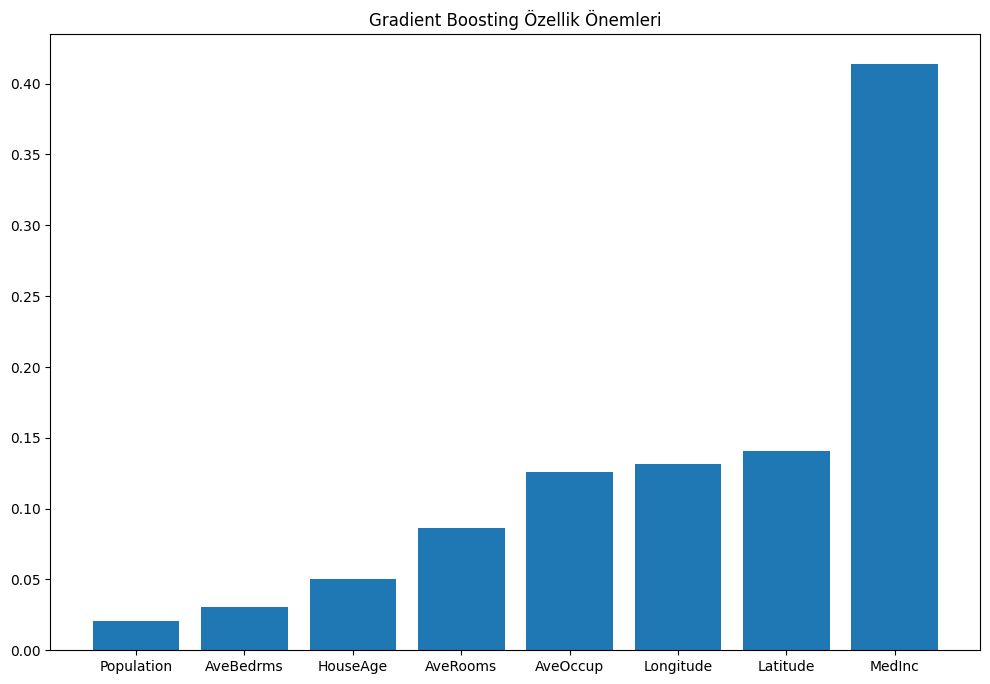

In [46]:
#En iyi modelin(GB) özellik önemlerini görselleştirme
feature_importance=gb_best.feature_importances_
sorted_idx=np.argsort(feature_importance)
plt.figure(figsize=(12,8))
plt.bar(range(len(sorted_idx)),feature_importance[sorted_idx])
plt.xticks(range(len(sorted_idx)),[housing.feature_names[i] for i in sorted_idx])
plt.title("Gradient Boosting Özellik Önemleri")
plt.show()

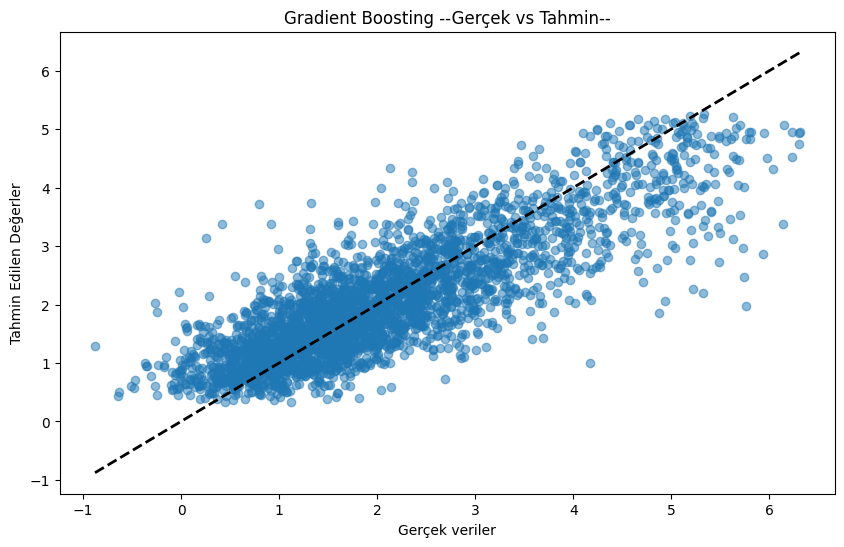

In [47]:
# Tahminleri görselleştirme
plt.figure(figsize=(10,6))
plt.scatter(y_test,y_pred_gb_final,alpha=0.5)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],"k--",lw=2)
plt.xlabel("Gerçek veriler")
plt.ylabel("Tahmin Edilen Değerler")
plt.title("Gradient Boosting --Gerçek vs Tahmin--")
plt.show()

Text(0.5, 1.0, 'Residual PLot')

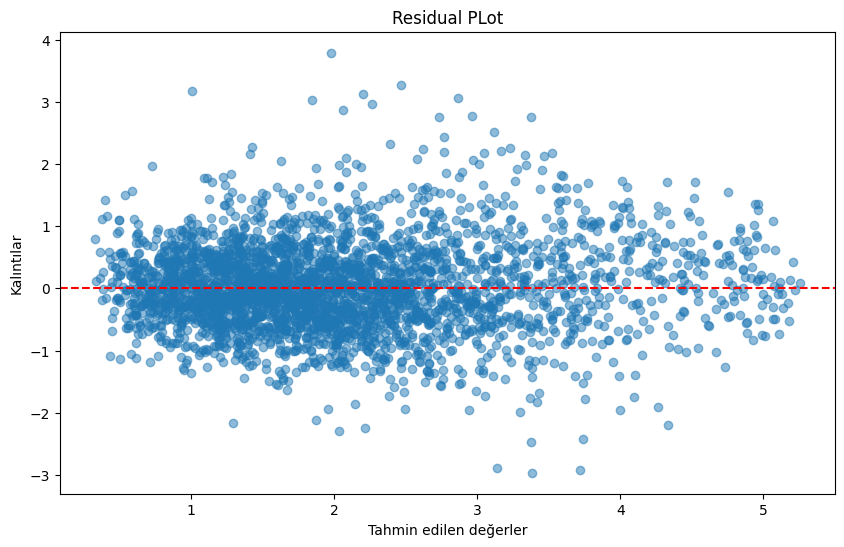

In [48]:
#Residual plot(kalıntı grafiği)
residuals=y_test - y_pred_gb_final
plt.figure(figsize=(10,6))
plt.scatter(y_pred_gb_final,residuals,alpha=0.5)
plt.axhline(y=0,color="r",linestyle="--")
plt.xlabel("Tahmin edilen değerler")
plt.ylabel("Kalıntılar")
plt.title("Residual PLot")

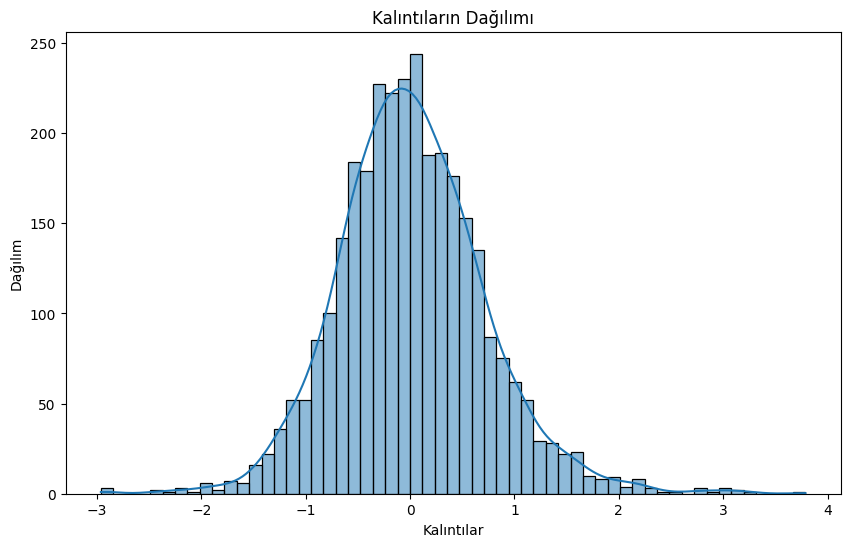

In [49]:
#Kalıntıların Dağılım
plt.figure(figsize=(10,6))
sns.histplot(residuals,kde=True)
plt.xlabel("Kalıntılar")
plt.ylabel("Dağılım")
plt.title("Kalıntıların Dağılımı")
plt.show()